In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
m = np.loadtxt('XYmagnetization.txt', usecols=(0), unpack=True)

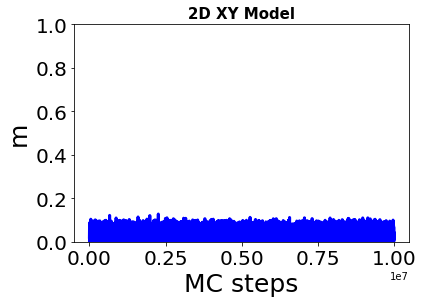

In [4]:
plt.plot(m, lw=3, color='blue')
#plt.xlim(0,1000)
plt.ylim(0,1)
plt.xlabel('MC steps', fontsize='25')
plt.ylabel('m', fontsize='25')
plt.tick_params(labelsize=20)
plt.title('2D XY Model', fontsize= 15, fontweight='bold')
#plt.legend(loc='upper right', prop={'size': 20})
plt.show()

In [5]:
N = 28
M = N*N

In [6]:
print(m)

[0.02132626 0.02140461 0.02133462 ... 0.017406   0.01747768 0.01750531]


In [7]:
print(len(m))

10000000


100
100


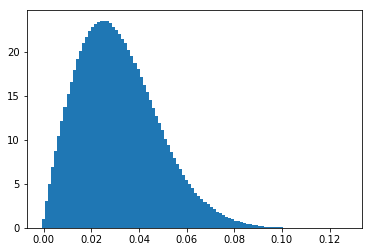

In [8]:
k = 100
n, bins, patches = plt.hist(m, bins=k, align='left', density=True)
t = np.arange(bins[0], bins[k], (bins[k]-bins[0])/k)
print(len(t))
print(len(n))
#plt.clf()

In [12]:
UPro = []
for i in range(k-1): # Unnormalized Probability distribution array has size k-1
    temp = (1/ (2*np.pi*m[i]) ) * n[i]
    UPro.append(temp)

mprime = m[:-1]

In [9]:
s = 0
for i in range(len(n)):
   s += n[i] * ((bins[i] + bins[i+1]) / 2) 
f = s / np.sum(n)
print('The first moment is', f)

e = 0
for i in range(len(n)):
   e += n[i] * ((bins[i] + bins[i+1]) / 2)*((bins[i] + bins[i+1]) / 2)
secmom = e / np.sum(n)
print('The second moment is', secmom)

chi = M*secmom
print('Chi is', chi)

The first moment is 0.03199568776898835
The second moment is 0.001303056692868176
Chi is 1.0215964472086498


In [10]:
def clt(t):
    return (2/(chi/M))*t*np.exp((-1/(chi/M))*(t**2))

def CltDensity(x):
    return (2/(chi/M))*x*np.exp((-1/(chi/M))*(x**2))

def CltProb(x):
    return (M/(np.pi*chi))*np.exp((-M/chi)*(x**2))  # Normalized probability distribution of Q vector

def UnNormRate(x):
    return (x*x)/chi

def NormRate(x):
    return (-1/M)*np.log(CltProb(x))

In [20]:
corr = 1/2
C = (M/4)*(2/chi - 1 - corr)
be = 0.802
#be = 2.631 # for bJ=0.9
#be = 3.424 for bJ=0.01

def ldt(t):
    return t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))
r = integrate.quad(lambda x: ldt(x), 0, 1, full_output=1)[0]
def normldt(t):
    return (1/r)*t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))

def UnPadeProb(x):
    return ((1-x**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(x**2))*np.exp(C*(x**4))*np.exp((M/4)*be*(x**4))

def UnPadeDen(x):
    return 2*np.pi*x*UnPadeProb(x)

r2 = integrate.quad(lambda x: UnPadeDen(x), 0, 1, full_output=1)[0]

def NormProb(x):
    return (1/r2)*UnPadeProb(x)

def paderate(x):
    return (-1/M)*np.log(NormProb(x))

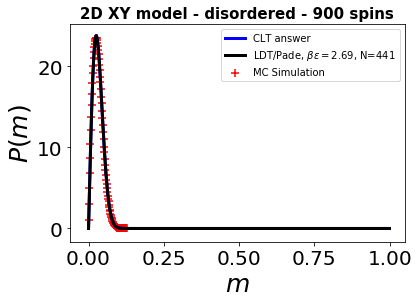

In [21]:
z = np.arange(0,1,0.001)
plt.plot(z, clt(z), color='blue', lw=3, label='CLT answer')
plt.plot(z, normldt(z), color='black',lw=3, label=r'LDT/Pade, $\beta \epsilon=2.69$, N=441')

plt.scatter(t, n, color='red', s=50, marker='+', label='MC Simulation')
plt.xlabel(r'$m$', fontsize='25')
plt.ylabel(r'$P(m)$', fontsize='25')
#plt.xlim(0, 0.13)
#plt.ylim(0,5)
plt.tick_params(labelsize=20)
plt.title('2D XY model - disordered - 900 spins', fontsize= 15, fontweight='bold')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

In [22]:
def cltrate(t):
    return -(1/M)*np.log(clt(t))

In [23]:
simrate = -(1/M)*np.log(n)

In [24]:
def ldtrate(t):
    return (-1/M)*np.log(normldt(t))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


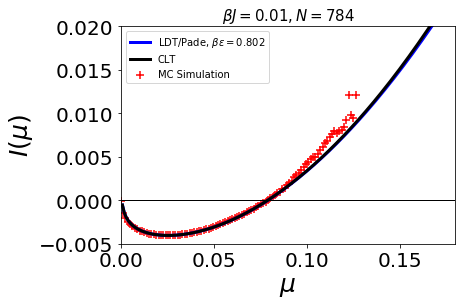

In [55]:
plt.plot(z, ldtrate(z), color='blue',lw=3, label=r'LDT/Pade, $\beta \epsilon = 0.802$')
plt.plot(z, cltrate(z), color='black', lw=3, label='CLT')
plt.scatter(t, simrate, label='MC Simulation', color='red', s=50, marker='+')


mu = np.arange(0,1,0.1)
plt.plot(mu, 0*mu, color='black', lw=1)

plt.xlim(0,0.18)
plt.ylim(-0.005,0.02)
plt.xlabel(r'$\mu$', fontsize='25')
plt.ylabel(r'$I(\mu)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$\beta J=0.01, N=784$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper left', prop={'size': 10})
plt.savefig('/Users/κωτς/Desktop/image6.pdf', transparent=True, bbox_inches='tight')

In [53]:
root = []
axis = []

for a in range(190, 2192, 1):

    be = a/1000
    
    axis.append(be)
    C = (M/4)*(2/chi - 1 - corr)

    def ldt(t):
        return t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))
    r = integrate.quad(lambda x: ldt(x), 0, 1, full_output=1)[0]
    def normldt(t):
        return (1/r)*t*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4))

    def normqtimespq(t):
        return (1/r)*(t*t)*((1-t**2)**(M/2))*np.exp(-M*(1/chi - 1/2)*(t**2))*np.exp(C*(t**4))*np.exp((M/4)*be*(t**4)) 

    av = integrate.quad(lambda x: normqtimespq(x), 0, 1, full_output=1)[0]
    diff = abs(av-f)
    root.append(diff)
    print('be:', be, '<Q>_num:', int, '<Q>_sim-<Q>_num:', diff)

be: 0.19 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1400952598085434e-05
be: 0.191 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1382356571269792e-05
be: 0.192 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1363760445491644e-05
be: 0.193 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1345164220737114e-05
be: 0.194 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1326567897006201e-05
be: 0.195 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1307971474312783e-05
be: 0.196 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1289374952629105e-05
be: 0.197 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.12707783319968e-05
be: 0.198 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1252181612374235e-05
be: 0.199 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1233584793782225e-05
be: 0.2 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1214987876199956e-05
be: 0.201 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1196390859648242e-05
be: 0.202 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1177793744113207e-05
be: 0.203 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1159

be: 0.326 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.87098389759644e-06
be: 0.327 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.852374399327678e-06
be: 0.328 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.833764801922939e-06
be: 0.329 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.815155105368344e-06
be: 0.33 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.796545309684711e-06
be: 0.331 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.777935414837346e-06
be: 0.332 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.759325420833186e-06
be: 0.333 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.74071532769305e-06
be: 0.334 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.722105135409997e-06
be: 0.335 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.703494843963211e-06
be: 0.336 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.68488445336657e-06
be: 0.337 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.666273963627014e-06
be: 0.338 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.647663374702907e-06
be: 0.339 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.629052686642824e

be: 0.44 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.7488622067721216e-06
be: 0.441 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.730241397925885e-06
be: 0.442 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.7116204898048926e-06
be: 0.443 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.692999482367512e-06
be: 0.444 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.674378375662315e-06
be: 0.445 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.655757169647669e-06
be: 0.446 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.637135864337451e-06
be: 0.447 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.6185144597386e-06
be: 0.448 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.599892955837239e-06
be: 0.449 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.581271352654183e-06
be: 0.45 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.5626496501478004e-06
be: 0.451 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.544027848345846e-06
be: 0.452 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.525405947234442e-06
be: 0.453 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 6.5067839468274

be: 0.588 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.991901740406367e-06
be: 0.589 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.9732662226454885e-06
be: 0.59 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.954630605380871e-06
be: 0.591 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.935994888640271e-06
be: 0.592 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.917359072402871e-06
be: 0.593 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.8987231566964264e-06
be: 0.594 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.8800871415001215e-06
be: 0.595 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.861451026820895e-06
be: 0.596 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.842814812644868e-06
be: 0.597 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.824178498978981e-06
be: 0.598 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.8055420858301714e-06
be: 0.599 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.7869055731776236e-06
be: 0.6 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.768268961035215e-06
be: 0.601 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 3.7496322494

be: 0.75 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 9.716496267853092e-07
be: 0.751 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 9.529979761793705e-07
be: 0.752 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 9.343462258823432e-07
be: 0.753 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 9.156943758803493e-07
be: 0.754 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.970424261872667e-07
be: 0.755 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.783903768030954e-07
be: 0.756 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.597382277139576e-07
be: 0.757 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.410859789406699e-07
be: 0.758 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.224336304693547e-07
be: 0.759 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.03781182286134e-07
be: 0.76 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 7.851286343979469e-07
be: 0.761 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 7.664759868256099e-07
be: 0.762 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 7.478232395413675e-07
be: 0.763 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 7.291703925382809

be: 0.927 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.331246503749218e-06
be: 0.928 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.3499158199741244e-06
be: 0.929 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.368585236119103e-06
be: 0.93 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.3872547521910925e-06
be: 0.931 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4059243681831544e-06
be: 0.932 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4245940841091662e-06
be: 0.933 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4432638999552503e-06
be: 0.934 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4619338157214066e-06
be: 0.935 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4806038314284518e-06
be: 0.936 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.499273947062508e-06
be: 0.937 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.5179441626374532e-06
be: 0.938 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.5366144781324707e-06
be: 0.939 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.555284893561438e-06
be: 0.94 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.57395

be: 1.095 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.469094345282588e-06
be: 1.096 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.48778046668974e-06
be: 1.097 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.506466688239009e-06
be: 1.098 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.525153009909578e-06
be: 1.099 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.5438394317500195e-06
be: 1.1 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.562525953725639e-06
be: 1.101 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.581212575843375e-06
be: 1.102 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.599899298117106e-06
be: 1.103 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.618586120546831e-06
be: 1.104 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.637273043111735e-06
be: 1.105 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.655960065825694e-06
be: 1.106 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.674647188702586e-06
be: 1.107 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.693334411742412e-06
be: 1.108 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 5.71202173491741

be: 1.265 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.647174569831328e-06
be: 1.266 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.665877734112537e-06
be: 1.267 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.684580998771785e-06
be: 1.268 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.703284363774377e-06
be: 1.269 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.721987829161948e-06
be: 1.27 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.74069139491368e-06
be: 1.271 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.759395061022635e-06
be: 1.272 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.778098827509628e-06
be: 1.273 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.7968026943816e-06
be: 1.274 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.815506661624672e-06
be: 1.275 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.834210729224967e-06
be: 1.276 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.852914897224118e-06
be: 1.277 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.87161916558743e-06
be: 1.278 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 8.89032353433572e-0

be: 1.389 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.0967132729425288e-05
be: 1.39 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.0985848348958605e-05
be: 1.391 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1004564069001799e-05
be: 1.392 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1023279889596505e-05
be: 1.393 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1041995810708027e-05
be: 1.394 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1060711832364123e-05
be: 1.395 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1079427954550913e-05
be: 1.396 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.109814417726146e-05
be: 1.397 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1116860500516579e-05
be: 1.398 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1135576924302393e-05
be: 1.399 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.115429344862584e-05
be: 1.4 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1173010073493861e-05
be: 1.401 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1191726798906454e-05
be: 1.402 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.1210

be: 1.51 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.323245290529157e-05
be: 1.511 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3251180698281573e-05
be: 1.512 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3269908591968804e-05
be: 1.513 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3288636586332447e-05
be: 1.514 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.330736468138638e-05
be: 1.515 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.332609287714448e-05
be: 1.516 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.334482117358593e-05
be: 1.517 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3363549570724609e-05
be: 1.518 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3382278068560516e-05
be: 1.519 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3401006667093651e-05
be: 1.52 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3419735366324015e-05
be: 1.521 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3438464166251607e-05
be: 1.522 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.3457193066890305e-05
be: 1.523 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.34759

be: 1.688 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6567587416027596e-05
be: 1.689 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6586333152303345e-05
be: 1.69 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6605078989512245e-05
be: 1.691 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6623824927640418e-05
be: 1.692 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.664257096671562e-05
be: 1.693 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6661317106696216e-05
be: 1.694 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6680063347603025e-05
be: 1.695 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6698809689442984e-05
be: 1.696 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6717556132216094e-05
be: 1.697 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6736302675929293e-05
be: 1.698 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6755049320582582e-05
be: 1.699 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6773796066155144e-05
be: 1.7 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.6792542912667796e-05
be: 1.701 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.681

be: 1.81 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8855312552960857e-05
be: 1.811 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8874070611747673e-05
be: 1.812 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8892828771634174e-05
be: 1.813 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.891158703259954e-05
be: 1.814 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8930345394650716e-05
be: 1.815 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8949103857801575e-05
be: 1.816 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.896786242203824e-05
be: 1.817 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.8986621087353772e-05
be: 1.818 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.9005379853775928e-05
be: 1.819 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.9024138721297768e-05
be: 1.82 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.9042897689912353e-05
be: 1.821 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.9061656759626622e-05
be: 1.822 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.9080415930440575e-05
be: 1.823 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 1.909

be: 1.933 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1163312636393594e-05
be: 1.934 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.118208313875436e-05
be: 1.935 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.120085374238828e-05
be: 1.936 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.121962444728842e-05
be: 1.937 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1238395253413145e-05
be: 1.938 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1257166160797147e-05
be: 1.939 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1275937169454306e-05
be: 1.94 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1294708279349928e-05
be: 1.941 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1313479490511766e-05
be: 1.942 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.133225080294676e-05
be: 1.943 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.135102221662022e-05
be: 1.944 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1369793731566833e-05
be: 1.945 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.1388565347758848e-05
be: 1.946 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.14073

be: 2.101 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.431817841167666e-05
be: 2.102 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4336965942860223e-05
be: 2.103 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.435575357550429e-05
be: 2.104 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.437454130963662e-05
be: 2.105 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4393329145236398e-05
be: 2.106 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4412117082317497e-05
be: 2.107 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.443090512088686e-05
be: 2.108 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4449693260923666e-05
be: 2.109 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4468481502455675e-05
be: 2.11 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4487269845469006e-05
be: 2.111 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.450605828996366e-05
be: 2.112 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4524846835953518e-05
be: 2.113 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.4543635483424697e-05
be: 2.114 <Q>_num: <class 'int'> <Q>_sim-<Q>_num: 2.45624